In [1]:
# Cell 1 - import the things you need
import logging
import sys
import importlib

import numpy as np
import pandas as pd

from hamilton import ad_hoc_utils, driver

logging.basicConfig(stream=sys.stdout)

In [2]:
# Cell 2 - import modules to create part of the DAG from
# We use the autoreload extension that comes with ipython to automatically reload modules when
# the code in them changes.

# import the jupyter extension
%load_ext autoreload
# set it to only reload the modules imported
%autoreload 1


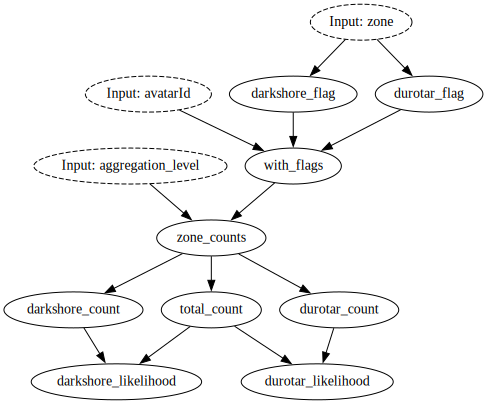

In [3]:
input_df = pd.read_parquet("data/wow.parquet")

aggregation_level = "avatarId"
zone_features = importlib.import_module("zone_features__pandas")

dr = driver.Driver({}, zone_features)  # can pass in multiple modules
dr.display_all_functions(None)

In [4]:
# we need to specify what we want in the final dataframe.
output_columns = [
    "total_count",
    "darkshore_count",
    "darkshore_likelihood",
]

# let's create the dataframe!
# if you only did `pip install sf-hamilton` earlier:
df = dr.execute(output_columns, inputs={**input_df.to_dict(orient='series'), "aggregation_level": aggregation_level})
# else if you did `pip install "sf-hamilton[visualization]"` earlier:
# dr.visualize_execution(output_columns, './my-dag.dot', {})
print(df)

          total_count  darkshore_count  darkshore_likelihood
avatarId                                                    
0                  76                0                   0.0
1                  19                0                   0.0
2                 192                0                   0.0
3                 109                0                   0.0
4                  76                0                   0.0
...               ...              ...                   ...
91060               1                0                   0.0
91061               2                0                   0.0
91062               5                0                   0.0
91063               2                0                   0.0
91064               1                0                   0.0

[91064 rows x 3 columns]
